Importing Libraries

In [3]:
print(10)

10


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [5]:
df = pd.read_csv('D:/Heart risk prediction/data/raw/framingham.csv')

Basic Information

In [6]:
print("Shape of Dataset:", df.shape)
print("\nColumns:\n", df.columns)
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 Rows:\n", df.head())

Shape of Dataset: (4240, 16)

Columns:
 Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

Data Types:
 male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

First 5 Rows:
    male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48 

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB
None


Analyze feature distributions using statistical summaries

In [8]:
print("\nStatistical Summary:\n", df.describe())

categorical_cols = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())



Statistical Summary:
               male          age    education  currentSmoker   cigsPerDay  \
count  4240.000000  4240.000000  4135.000000    4240.000000  4211.000000   
mean      0.429245    49.580189     1.979444       0.494104     9.005937   
std       0.495027     8.572942     1.019791       0.500024    11.922462   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4187.000000      4240.000000   4240.000000  4240.000000  4190.000000   
mean      0.029615         0.005896      0.310613     0.025708   236.699523   
std       0.169544         0.076569      0.462799     0

Identify target variable and class distribution

In [9]:
# Check target variable distribution
print("\nTarget variable: TenYearCHD")
print(df['TenYearCHD'].value_counts(normalize=True)*100)



Target variable: TenYearCHD
TenYearCHD
0    84.811321
1    15.188679
Name: proportion, dtype: float64


Create data profiling report

In [10]:
# Missing values
print("\nMissing Values:\n", df.isnull().sum())

# Data types and non-null counts
print("\nInfo:")
print(df.info())

# Ranges
print("\nFeature Ranges:\n", df.describe().loc[['min','max']])



Missing Values:
 male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 

Generate initial visualizations

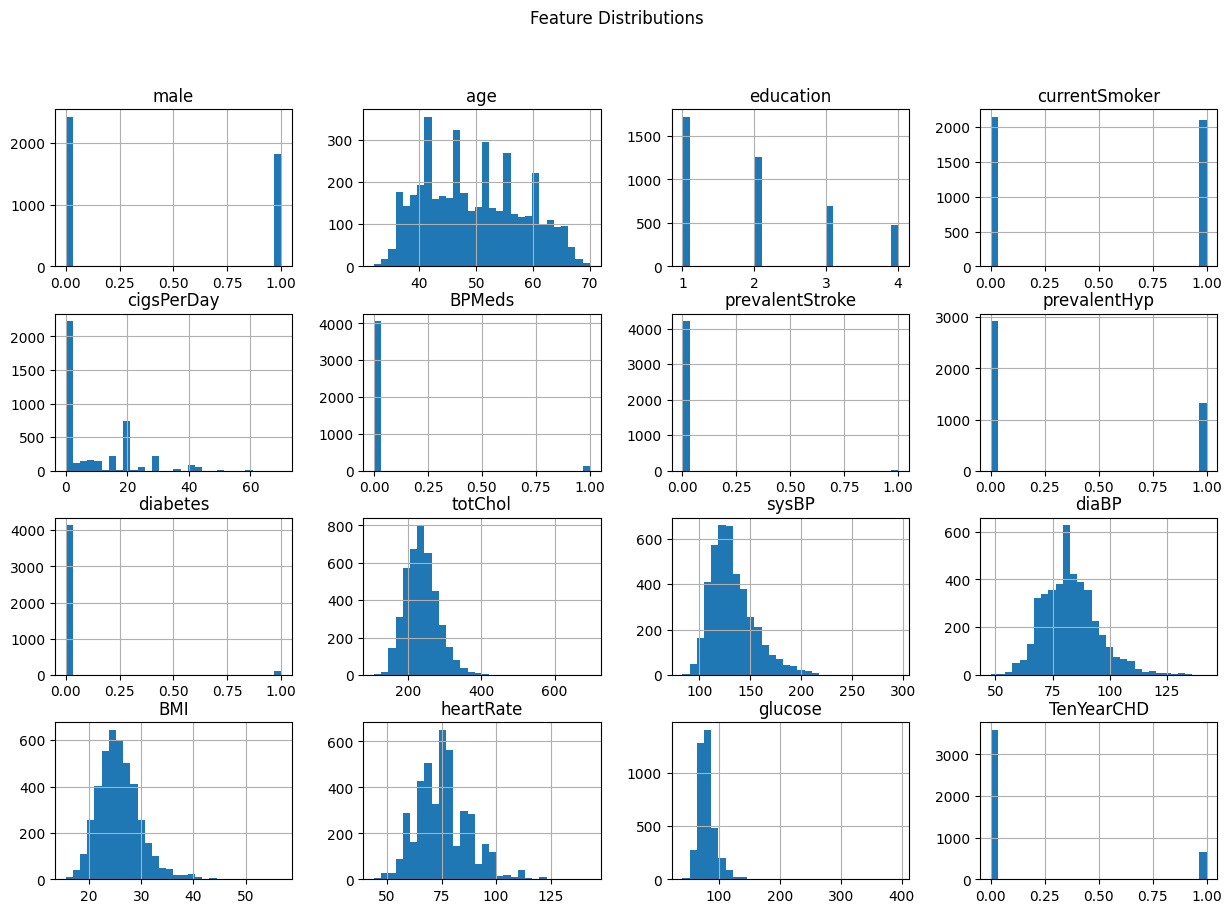

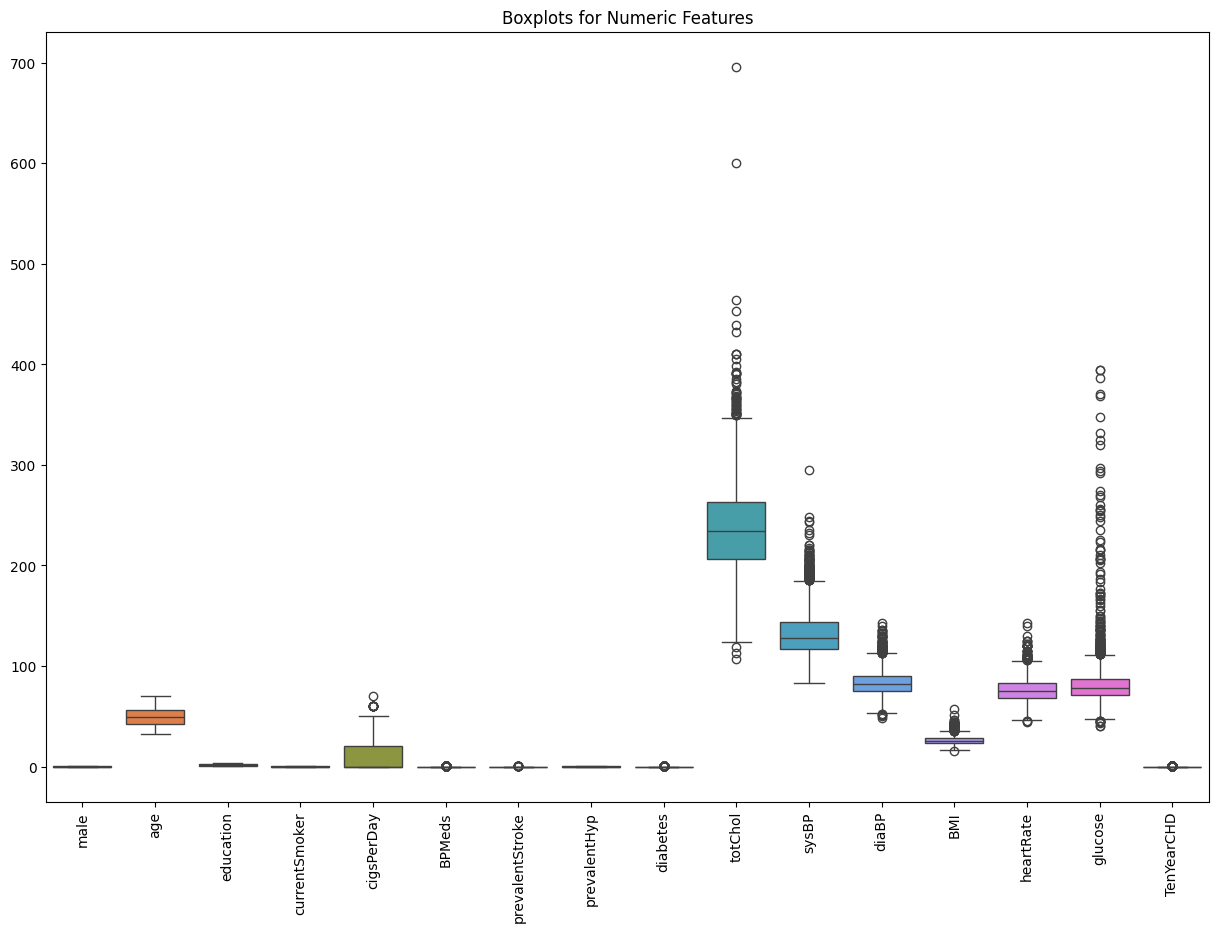

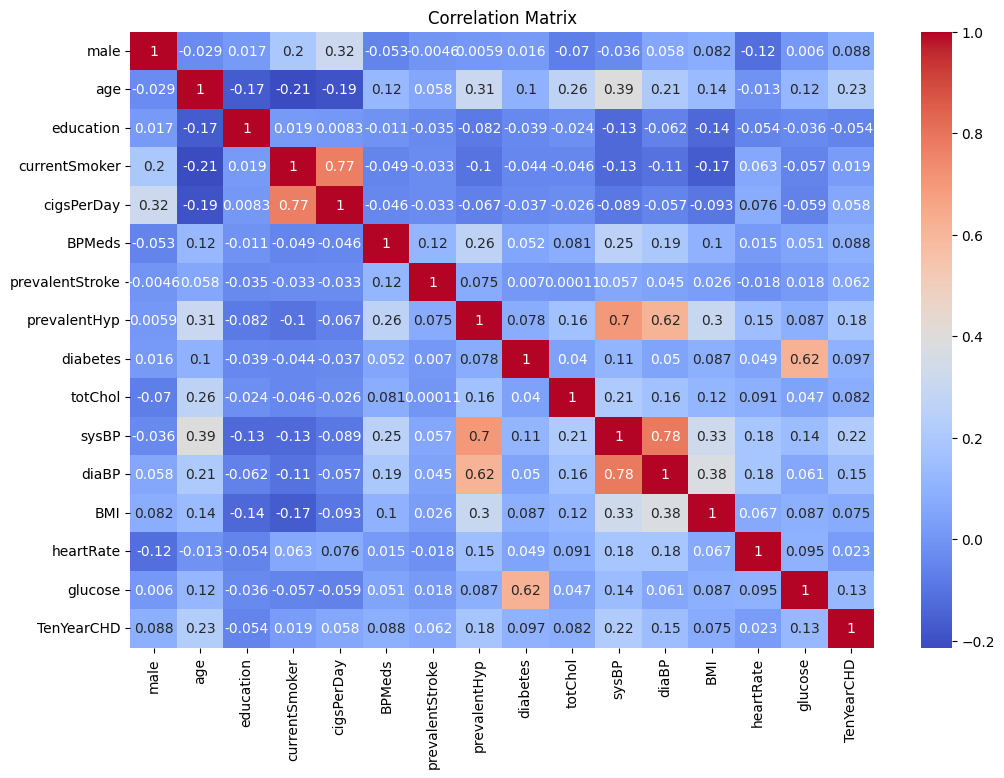

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numeric columns
df.hist(figsize=(15,10), bins=30)
plt.suptitle('Feature Distributions')
plt.show()

# Boxplots
plt.figure(figsize=(15,10))
sns.boxplot(data=df.select_dtypes(include=['float64','int64']))
plt.title('Boxplots for Numeric Features')
plt.xticks(rotation=90)
plt.show()

# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


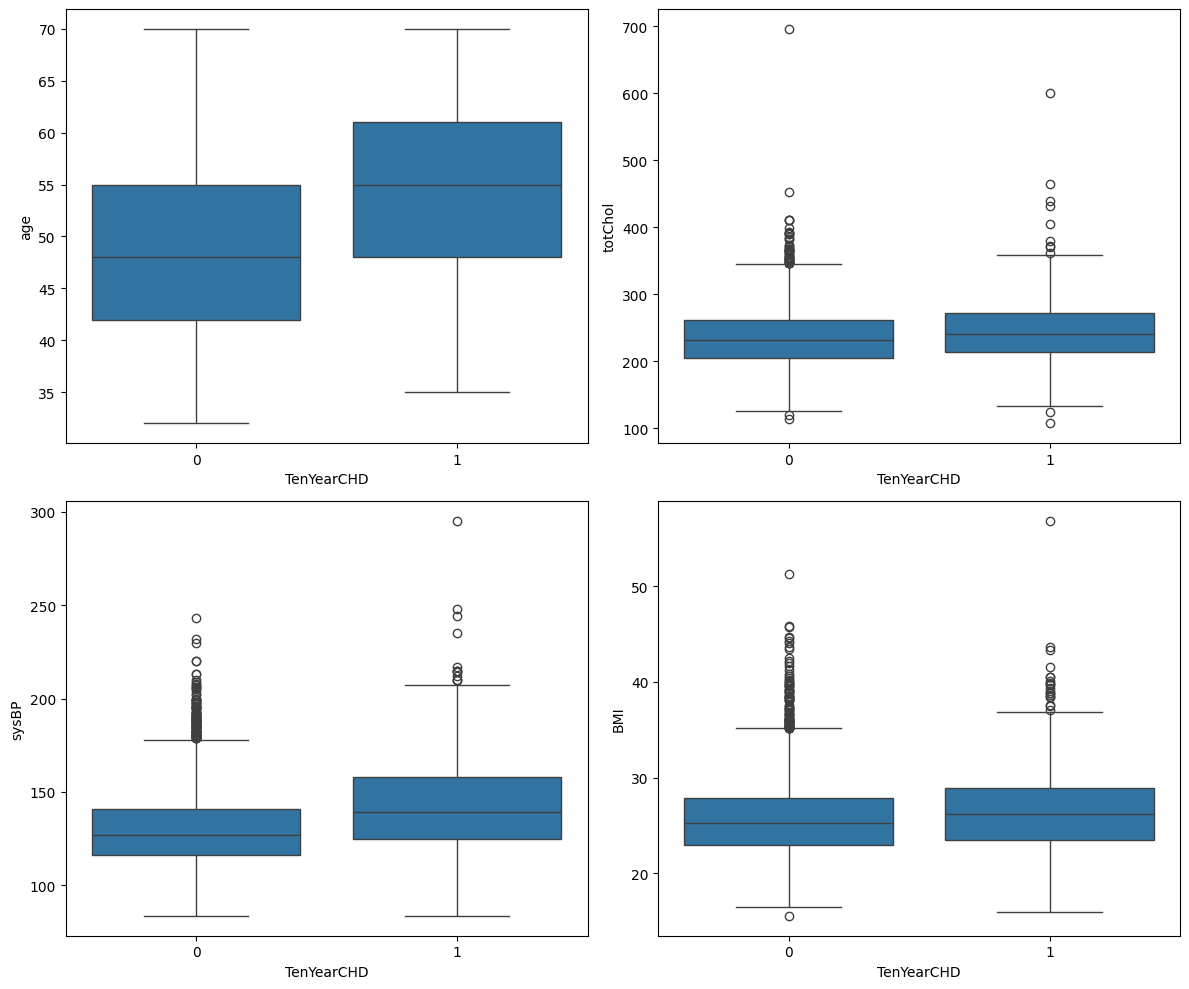

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))

sns.boxplot(x="TenYearCHD", y="age", data=df, ax=axes[0,0])
sns.boxplot(x="TenYearCHD", y="totChol", data=df, ax=axes[0,1])
sns.boxplot(x="TenYearCHD", y="sysBP", data=df, ax=axes[1,0])
sns.boxplot(x="TenYearCHD", y="BMI", data=df, ax=axes[1,1])

plt.tight_layout()
plt.show()
